In [1]:
import random
import networkx as nx
import math
import itertools    
import matplotlib.pyplot as plt
import ast
import numpy as np
import operator

In [2]:
with open('sensornew.txt', 'r') as f:
    sensor = ast.literal_eval(f.read())

In [3]:
sensor

[(7, 432),
 (8, 471),
 (128, 386),
 (149, 119),
 (157, 329),
 (200, 439),
 (295, 424),
 (311, 359),
 (330, 207),
 (338, 163),
 (346, 22),
 (353, 327),
 (354, 119),
 (387, 442),
 (489, 392)]

In [29]:
s=[list(i) for i in sensor]

In [30]:
s

[[7, 432],
 [8, 471],
 [128, 386],
 [149, 119],
 [157, 329],
 [200, 439],
 [295, 424],
 [311, 359],
 [330, 207],
 [338, 163],
 [346, 22],
 [353, 327],
 [354, 119],
 [387, 442],
 [489, 392]]

In [42]:
import matplotlib.pyplot as plt
import numpy as np

In [43]:
from matplotlib import style
style.use('ggplot')


In [44]:
X=np.array(s)

In [45]:
X[:,0]

array([  7,   8, 128, 149, 157, 200, 295, 311, 330, 338, 346, 353, 354,
       387, 489])

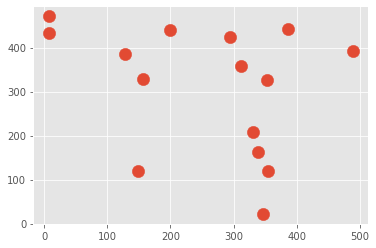

In [46]:
plt.scatter(X[:,0],X[:,1],s=150)
plt.show()

In [57]:
class K_Means:
    def __init__(self,k=3, tol=0.001,max_iter=1000):
        self.k=k
        self.tol=tol
        self.max_iter=300
    def fit(self,data):
        self.centroids={}
        for i in range(self.k):
            self.centroids[i]=data[i]
        for i in range(self.max_iter):
            self.classifications={}
            for i in range(self.k):
                self.classifications[i]=[]
            for featureset in data:
                distances=[np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids ]
                classification=distances.index(min(distances))
                self.classifications[classification].append(featureset)
            prev_centroids=dict(self.centroids)
            for classification in self.classifications:
                self.centroids[classification]=np.average(self.classifications[classification],axis=0)
            optimized =True
            for c in self.centroids:
                original_centroid=prev_centroids[c]
                current_centroid=self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0)>self.tol:
                    optimized=False
            if optimized:
                break
    def predict(self,data):
        distances=[np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification=distances.index(min(distances))
        return classification
                

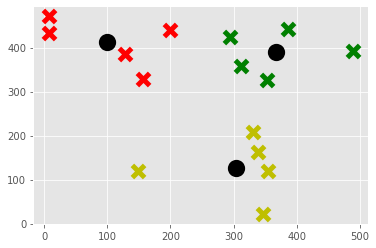

In [58]:
model=K_Means()
model.fit(X)
colors=['g','r','y']

for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],marker="o", color="k", s=150, linewidths=5)
for classification in model.classifications:
    color=colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
plt.show()
        